In [ ]:
# Mammooty- Mohanlal Image Classification using CNN

In [1]:
#Importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
#unzipping Data

path = '/content/Data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
[ ]
[1]

zip_object.close()

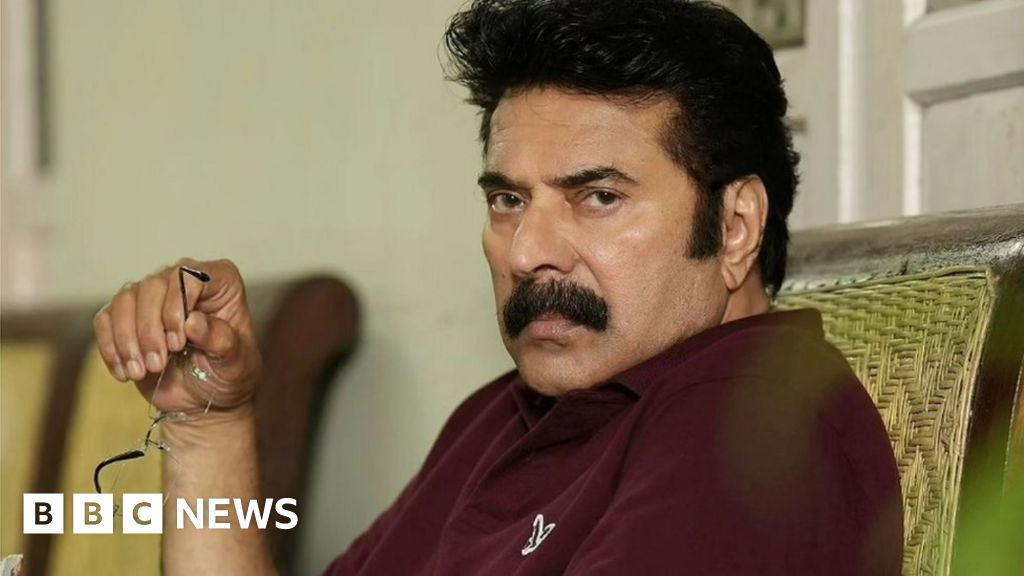

In [3]:
tf.keras.preprocessing.image.load_img('/content/Data/train/Mammooty/1.jpg')

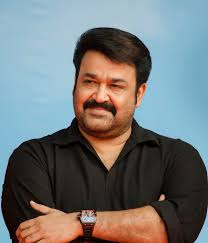

In [4]:
tf.keras.preprocessing.image.load_img('/content/Data/train/Mohanlal/14.jpeg')

Train and test set

In [56]:
training_generator = ImageDataGenerator(rescale=1./255, rotation_range=7, horizontal_flip=True, zoom_range=0.2)

train_dataset = training_generator.flow_from_directory('/content/Data/train',
                                                        target_size = (64, 64),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                       shuffle = True)

Found 99 images belonging to 2 classes.


In [57]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [58]:
test_generator = ImageDataGenerator(rescale=1./255)

test_dataset = test_generator.flow_from_directory('/content/Data/test',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 54 images belonging to 2 classes.


In [69]:
network=Sequential()
network.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=577,activation='relu'))
network.add(Dense(units=577,activation='relu'))
network.add(Dense(units=2,activation='softmax')) #here 2 refers to the no. of classes

In [70]:
network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 32)         

In [71]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [72]:
history = network.fit_generator(train_dataset, epochs=100)

Epoch 1/100


<ipython-input-72-19cb37b8815f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs=100)


13/13 [==============================] - 2s 41ms/step - loss: 0.7453 - accuracy: 0.4545
Epoch 2/100
13/13 [==============================] - 1s 53ms/step - loss: 0.6919 - accuracy: 0.5859
Epoch 3/100
13/13 [==============================] - 1s 45ms/step - loss: 0.6895 - accuracy: 0.5354
Epoch 4/100
13/13 [==============================] - 1s 37ms/step - loss: 0.7104 - accuracy: 0.5354
Epoch 5/100
13/13 [==============================] - 0s 37ms/step - loss: 0.6902 - accuracy: 0.5960
Epoch 6/100
13/13 [==============================] - 1s 37ms/step - loss: 0.6808 - accuracy: 0.5657
Epoch 7/100
13/13 [==============================] - 0s 35ms/step - loss: 0.6482 - accuracy: 0.6768
Epoch 8/100
13/13 [==============================] - 1s 38ms/step - loss: 0.5898 - accuracy: 0.6768
Epoch 9/100
13/13 [==============================] - 1s 38ms/step - loss: 0.6436 - accuracy: 0.6364
Epoch 10/100
13/13 [==============================] - 1s 37ms/step - loss: 0.5765 - accuracy: 0.7172
Epoch 11/10

# **Evaluating the Model **

In [73]:
test_dataset.class_indices

{'Mammooty': 0, 'Mohanlal': 1}

In [74]:
predictions = network.predict(test_dataset)
predictions

54/54 [==============================] - 1s 8ms/step


array([[8.76298547e-01, 1.23701446e-01],
       [1.47296503e-01, 8.52703512e-01],
       [9.98742759e-01, 1.25725020e-03],
       [1.94661679e-05, 9.99980569e-01],
       [9.65249956e-01, 3.47500965e-02],
       [9.99978542e-01, 2.14860556e-05],
       [8.69994044e-01, 1.30005971e-01],
       [9.66880500e-01, 3.31194438e-02],
       [9.95248377e-01, 4.75169020e-03],
       [9.94558096e-01, 5.44190686e-03],
       [9.97017503e-01, 2.98252981e-03],
       [9.99930263e-01, 6.96741554e-05],
       [9.99987125e-01, 1.28235361e-05],
       [2.64107971e-03, 9.97358859e-01],
       [9.73328233e-01, 2.66717747e-02],
       [9.99964356e-01, 3.56685632e-05],
       [9.99979258e-01, 2.07636749e-05],
       [7.03551397e-02, 9.29644883e-01],
       [9.00725722e-01, 9.92742628e-02],
       [9.88166630e-01, 1.18333725e-02],
       [1.55717641e-01, 8.44282389e-01],
       [9.99989152e-01, 1.08681043e-05],
       [1.82432055e-01, 8.17567885e-01],
       [1.00000000e+00, 2.29431549e-08],
       [9.999002

In [75]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [76]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.7592592592592593

In [78]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.77      0.74      0.75        27

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.76      0.76      0.76        54



In [79]:
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [80]:
from keras.models import save_model
network_saved = save_model(network, '/content/model.hdf5')

<ipython-input-80-495d969cc445>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(network, '/content/model.hdf5')


In [81]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_4", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_12_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_12", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": nu

In [82]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('model.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [83]:
network_loaded.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 32)         

In [84]:
#checking predictions

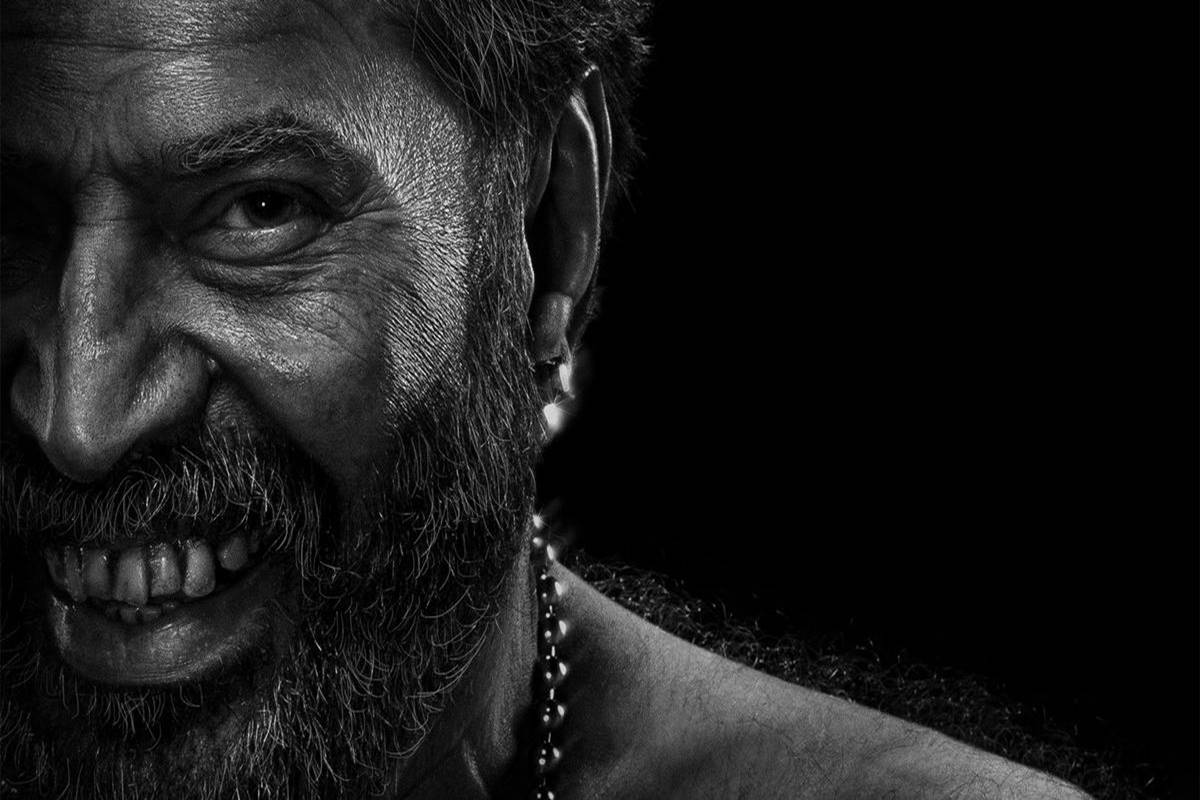

In [85]:
image = cv2.imread('/content/Data/test/Mammooty/68.jpg')
cv2_imshow(image)

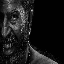

In [86]:
image = cv2.resize(image, (64, 64))
cv2_imshow(image)

array([[[11, 11, 11],
        [19, 19, 19],
        [23, 23, 23],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[10, 10, 10],
        [15, 15, 15],
        [22, 22, 22],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[12, 12, 12],
        [ 5,  5,  5],
        [ 8,  8,  8],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[ 5,  5,  5],
        [ 9,  9,  9],
        [14, 14, 14],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 0,  0,  0]],

       [[18, 18, 18],
        [20, 20, 20],
        [11, 11, 11],
        ...,
        [ 9,  9,  9],
        [ 0,  0,  0],
        [ 2,  2,  2]],

       [[ 4,  4,  4],
        [ 2,  2,  2],
        [11, 11, 11],
        ...,
        [ 1,  1,  1],
        [ 3,  3,  3],
        [ 3,  3,  3]]], dtype=uint8)
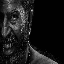

In [88]:
image

In [89]:
image = image / 255
image

array([[[0.04313725, 0.04313725, 0.04313725],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.09019608, 0.09019608, 0.09019608],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.03921569, 0.03921569, 0.03921569],
        [0.05882353, 0.05882353, 0.05882353],
        [0.08627451, 0.08627451, 0.08627451],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.04705882, 0.04705882, 0.04705882],
        [0.01960784, 0.01960784, 0.01960784],
        [0.03137255, 0.03137255, 0.03137255],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.01960784, 0.01960784, 0.01960784],
        [0.03529412, 0.03529412, 0.03529412],
        [0.05490196, 0

In [90]:
image.shape

(64, 64, 3)

In [91]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [92]:
result = network_loaded(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[9.9996710e-01, 3.2849544e-05]], dtype=float32)>

In [93]:
result = np.argmax(result)
result

0

In [94]:
test_dataset.class_indices

{'Mammooty': 0, 'Mohanlal': 1}

In [95]:
if result == 0:
  print('Mammooty')
else:
  print('Mohanlal')

Mammooty
